Importing Libraries

In [1]:
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from pathlib import Path

Defining the Custom KidneyNetV Model

In [2]:
# Define the KidneyNetV model
class KidneyNetV(nn.Module):
    def __init__(self):
        super().__init__()
        self.base_model = models.mobilenet_v2(pretrained=True)
        self.base_model.classifier = nn.Identity()  # Remove the original classifier
        self.custom_layers = nn.Sequential(
            nn.Dropout(p=0.5),  # Added dropout for regularization
            nn.Linear(1280, 2)  # Output size should match the number of classes
        )

    def forward(self, x):
        x = self.base_model(x)  # Get features from MobileNet
        x = x.view(x.size(0), -1)  # Flatten the output
        return self.custom_layers(x)

Loading the Saved Model

In [3]:
# Function to load the model
def load_model(model_path, model_name):
    dls = ImageDataLoaders.from_folder('Dataset', train='Train', valid='Test',
                                       item_tfms=Resize(224), batch_tfms=aug_transforms())
    model = KidneyNetV()  # Use your KidneyNetV model
    learn = Learner(dls, model, metrics=accuracy)
    learn.load(f'{model_path}/{model_name}')
    return learn

Path to the Model

In [4]:
# Model path
model_path = Path(r'C:\Users\vishn\Desktop\B.Tech - College Chetha\Vignana Pradarshanalu\GitHub Codes\Kidney_Stone_detection\Saved_Models\models')
model_name = 'Mark_VI_KidneyNetV'  # Change this to your saved model name
learn = load_model(model_path, model_name)

c:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vishn\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Input Image Path

In [5]:
# Input image path
img_path = r'C:\Users\vishn\Desktop\B.Tech - College Chetha\Vignana Pradarshanalu\GitHub Codes\Kidney_Stone_detection\Dataset\Test\Kidney_stone\1.3.46.670589.33.1.63713387527070807800001.4685965141890198074.png' 
# Update with the image path

Function to Predict the Image

In [6]:
# Function to predict kidney stones in an image
def predict_image(learn, img_path):
    img = PILImage.create(img_path)
    pred, pred_idx, probs = learn.predict(img)
    return pred, pred_idx, probs[pred_idx].item()

In [7]:
# Predict on the input image
prediction, pred_idx, probability = predict_image(learn, img_path)

Evaluating Model Performance

In [8]:
# Evaluate the model on the test set
valid_dl = learn.dls.valid
preds, targs = learn.get_preds(dl=valid_dl)
pred_classes = preds.argmax(dim=1)

In [9]:
# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(targs, pred_classes, average='weighted')
recall = recall_score(targs, pred_classes, average='weighted')
f1 = f1_score(targs, pred_classes, average='weighted')
accuracy = accuracy_score(targs, pred_classes)
classification_report_str = classification_report(targs, pred_classes)

Display Results

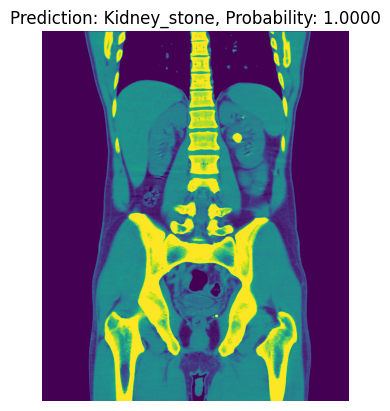

The model predicts the presence of kidney stones as: Kidney_stone with a probability of 1.0000


In [10]:
# Display the input image and prediction
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction: {prediction}, Probability: {probability:.4f}')
plt.show()

print(f'The model predicts the presence of kidney stones as: {prediction} with a probability of {probability:.4f}')


In [11]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9971
Precision: 0.9971
Recall: 0.9971
F1 Score: 0.9971


In [12]:
print("Classification Report:\n", classification_report_str)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       165
           1       0.99      1.00      1.00       181

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



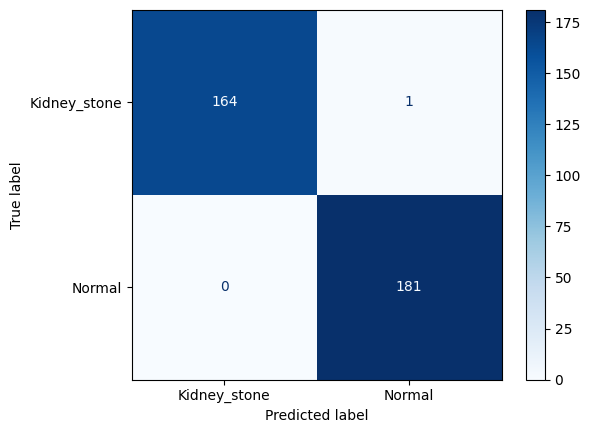

In [13]:
# Generate and display the confusion matrix
cm = confusion_matrix(targs, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=learn.dls.vocab)
disp.plot(cmap=plt.cm.Blues)
plt.show()